In [16]:
import cv2
import torch
from PIL import Image
from google.colab.patches import cv2_imshow
import os
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')
model.agnostic=True
model.conf=0.4

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2023-2-26 Python-3.8.10 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [21]:
import requests
import json
url = 'https://63fb3b507a045e192b654b62.mockapi.io/v1/Parking'
r = requests.get(url = url)
parkings = r.json()
parkings[0]['name']

'G1'

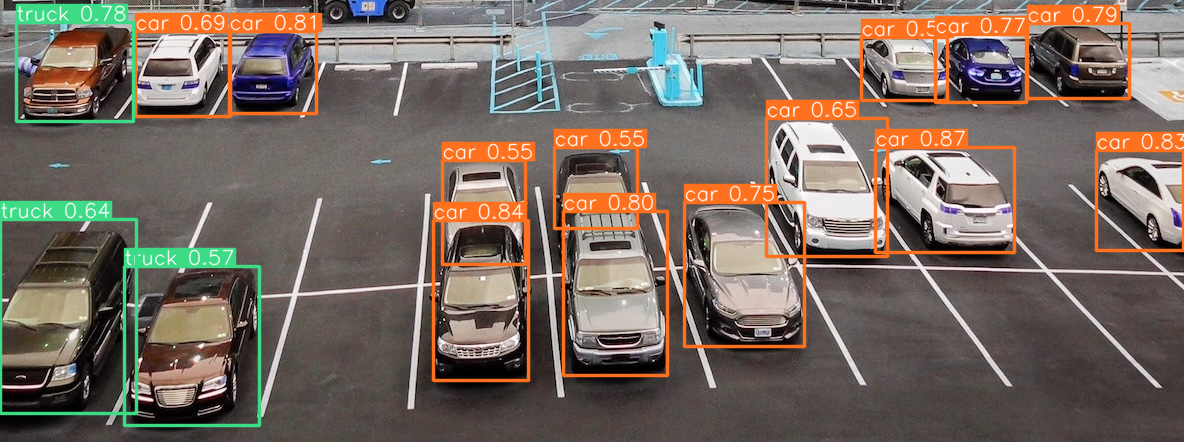

16
14 Available
<Response [200]>


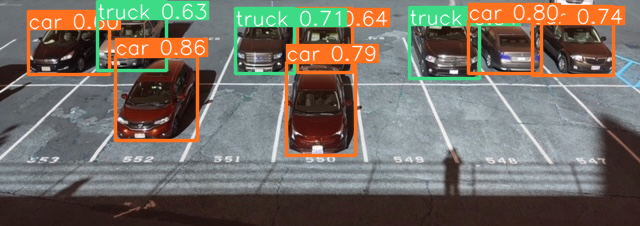

9
10 Available
<Response [200]>


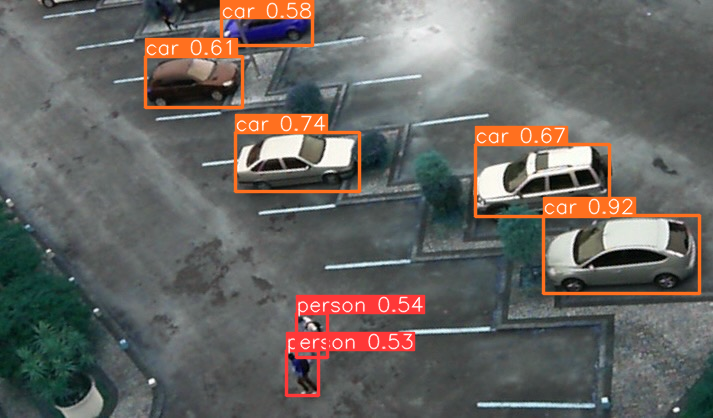

5
8 Available
<Response [200]>


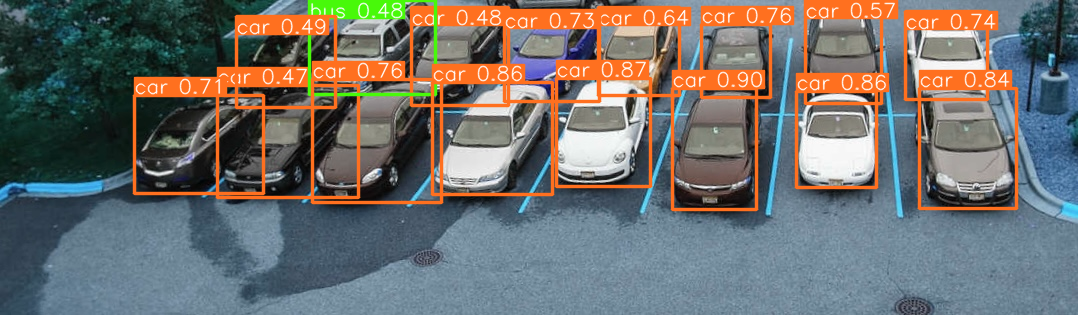

16
0 Available
<Response [200]>


In [22]:
import json
for filename in parkings:
    img = cv2.imread(os.path.join('/content/parking_imgs',filename['name']+".jpg"))
    #img = cv2.imread('/content/parking-in-philadelphia 2.jpg')
    # Inference
    results = model([img], size=640) # batch of images
    results.show()
    results.xyxy[0]  
    df=results.pandas().xyxy[0] 
    vehicles=['car','bicycle','truck','bus','motorcycle']
    df1=df[df['name'].isin(vehicles)]
    print(df1.shape[0])
    available=filename['total']-df1.shape[0]
    print(f"{available} Available")
    

    data = {"available": available}

    headers = {"Content-Type": "application/json"}

    response = requests.put(url+"/"+filename['id'], data=json.dumps(data), headers=headers)
    print(response)

